<a href="https://colab.research.google.com/github/gustavoslemos/ML-DeepLearningstuds/blob/main/Modelo_Arima_e_Modelo_Rede_Neural_LSTM_para_Previsao_de_Leads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/Projetos/Projetos Portfólio/Modelos Preditivos Python'

/content/drive/MyDrive/Projetos/Projetos Portfólio/Modelos Preditivos Python


In [3]:
import pandas as pd
df = pd.read_csv('leads.csv', delimiter=';', parse_dates=['data'], index_col='data')


/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '13/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '14/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '15/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/panda

In [4]:
df = df['2021':]


In [5]:
idx = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')


In [6]:
# Verificar entradas duplicadas
print(df.index.duplicated())

# Remover entradas duplicadas
df = df[~df.index.duplicated()]


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [7]:
df = df.interpolate(method='linear')

In [8]:
# Selecionar as datas correspondentes às previsões
prediction_dates = test_data.index[-len(predictions):]

# Selecionar as datas correspondentes às previsões
prediction_dates = test_data.index[-len(predictions):]

# Plotar os dados
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Teste')
plt.plot(prediction_dates, predictions, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Leads')
plt.legend()
plt.show()


NameError: ignored

/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '13/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '14/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '15/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/panda

None
<MonthEnd>
Erro de previsão: 62.516390407305956


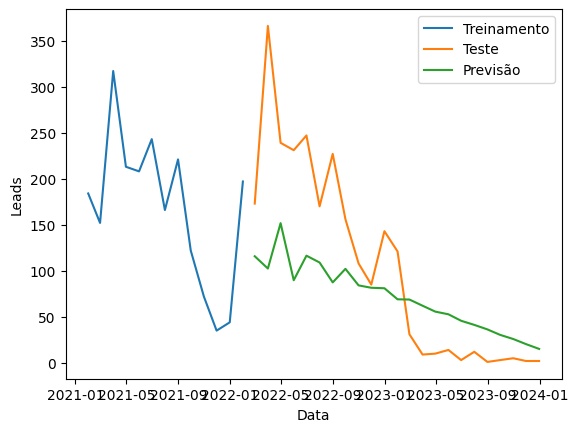

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Carregar dados
df = pd.read_csv('leads.csv', delimiter=';', index_col='data', parse_dates=True)

# Remover entradas duplicadas
df = df[~df.index.duplicated()]

# Verificar frequência dos dados
print(df.index.freq)

# Reamostrar os dados em uma frequência mensal
df = df.resample('M').sum()

# Verificar frequência dos dados novamente
print(df.index.freq)

# Definir conjunto de treinamento e teste
train_data = df.loc[:'2022-01-31']
test_data = df.loc['2022-02-28':]

# Criar modelo ARIMA
model = ARIMA(train_data, order=(2,2,2))

# Treinar modelo ARIMA
model_fit = model.fit()

# Fazer previsões
predictions = model_fit.forecast(steps=len(test_data))

# Calcular erro de previsão
error = np.mean(np.abs(predictions - test_data.values.flatten()))
print('Erro de previsão:', error)


# Selecionar as datas correspondentes às previsões
prediction_dates = pd.date_range(start=test_data.index[0], periods=len(test_data), freq='M')

# Plotar os dados
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Teste')
plt.plot(prediction_dates, predictions, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Leads')
plt.legend()
plt.show()


None
<MonthEnd>
Epoch 1/50
1/1 [==============================] - 9s 9s/step - loss: 0.3478
Epoch 2/50
1/1 [==============================] - 0s 43ms/step - loss: 0.2962
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 0.2484
Epoch 4/50
1/1 [==============================] - 0s 32ms/step - loss: 0.2015
Epoch 5/50
1/1 [==============================] - 0s 30ms/step - loss: 0.1542
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 0.1067
Epoch 7/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0611
Epoch 8/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0227
Epoch 9/50
1/1 [==============================] - 0s 38ms/step - loss: 0.0012
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 0.0092
Epoch 11/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0385
Epoch 12/50
1/1 [==============================] - 0s 36ms/step - loss: 0.0504
Epoch 13/50
1/1 [==============================

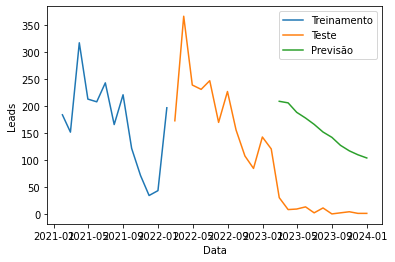

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Carregar dados
df = pd.read_csv('leads.csv', delimiter=';', index_col='data', parse_dates=True)

# Remover entradas duplicadas
df = df[~df.index.duplicated()]

# Verificar frequência dos dados
print(df.index.freq)

# Reamostrar os dados em uma frequência mensal
df = df.resample('M').sum()

# Verificar frequência dos dados novamente
print(df.index.freq)

# Definir conjunto de treinamento e teste
train_data = df.loc[:'2022-01-31']
test_data = df.loc['2022-02-28':]

# Escalar os dados
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Preparar dados de treinamento e teste
X_train, y_train = [], []
for i in range(12, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-12:i])
    y_train.append(train_data_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(12, len(test_data_scaled)):
    X_test.append(test_data_scaled[i-12:i])
    y_test.append(test_data_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)

# Criar modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar modelo LSTM
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Fazer previsões
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# # Calcular erro de previsão
# error = np.mean(np.abs(predictions - test_data.values))
# print('Erro de previsão:', error)

# Selecionar as datas correspondentes às previsões
prediction_dates = test_data.index[-len(predictions):]

# Plotar os dados
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Teste')
plt.plot(prediction_dates, predictions, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Leads')
plt.legend()
plt.show()


/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '13/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '14/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '15/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '16/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/usr/local/lib/python3.9/dist-packages/panda

None
<MonthEnd>
Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.6424 - val_loss: 0.9075
Epoch 2/300
1/1 [==============================] - 0s 89ms/step - loss: 0.5562 - val_loss: 0.9357
Epoch 3/300
1/1 [==============================] - 0s 134ms/step - loss: 0.4856 - val_loss: 0.9639
Epoch 4/300
1/1 [==============================] - 0s 81ms/step - loss: 0.4329 - val_loss: 0.9949
Epoch 5/300
1/1 [==============================] - 0s 101ms/step - loss: 0.3913 - val_loss: 1.0261
Epoch 6/300
1/1 [==============================] - 0s 137ms/step - loss: 0.3166 - val_loss: 1.0681
Epoch 7/300
1/1 [==============================] - 0s 124ms/step - loss: 0.2584 - val_loss: 1.1158
Epoch 8/300
1/1 [==============================] - 0s 85ms/step - loss: 0.1736 - val_loss: 1.1838
Epoch 9/300
1/1 [==============================] - 0s 156ms/step - loss: 0.1473 - val_loss: 1.2634
Epoch 10/300
1/1 [==============================] - 0s 129ms/step - loss: 0.0656 - val_loss: 1.3605

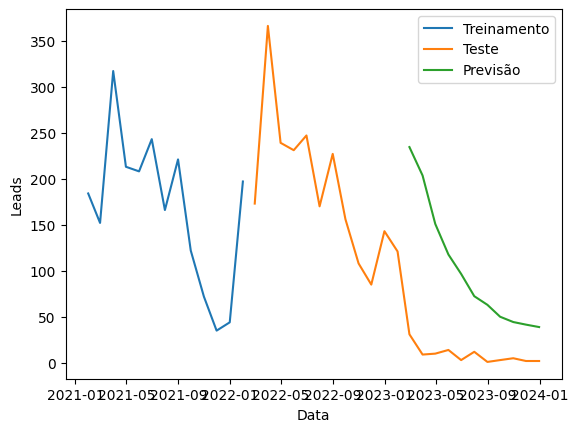

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

# Carregar dados
df = pd.read_csv('leads.csv', delimiter=';', index_col='data', parse_dates=True)

# Remover entradas duplicadas
df = df[~df.index.duplicated()]

# Verificar frequência dos dados
print(df.index.freq)

# Reamostrar os dados em uma frequência mensal
df = df.resample('M').sum()

# Verificar frequência dos dados novamente
print(df.index.freq)

# Definir conjunto de treinamento e teste
train_data = df.loc[:'2022-01-31']
test_data = df.loc['2022-02-28':]

# Aplicar transformação logarítmica na série temporal
train_data_log = np.log(train_data)
test_data_log = np.log(test_data)

# Escalonar os dados
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data_log)
test_data_scaled = scaler.transform(test_data_log)

# Preparar dados para modelo LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 12
X_train, y_train = prepare_data(train_data_scaled, n_steps)
X_test, y_test = prepare_data(test_data_scaled, n_steps)

# Construir modelo LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

# Treinar modelo LSTM com validação
history = model.fit(X_train, y_train, epochs=300, batch_size=18, verbose=1, validation_data=(X_test, y_test))

# Fazer previsões
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = np.exp(scaler.inverse_transform(predictions))

# Selecionar as datas correspondentes às previsões
prediction_dates = test_data.index[n_steps:]

# Plotar os dados
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Teste')
plt.plot(prediction_dates, predictions, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Leads')
plt.legend()
plt.show()


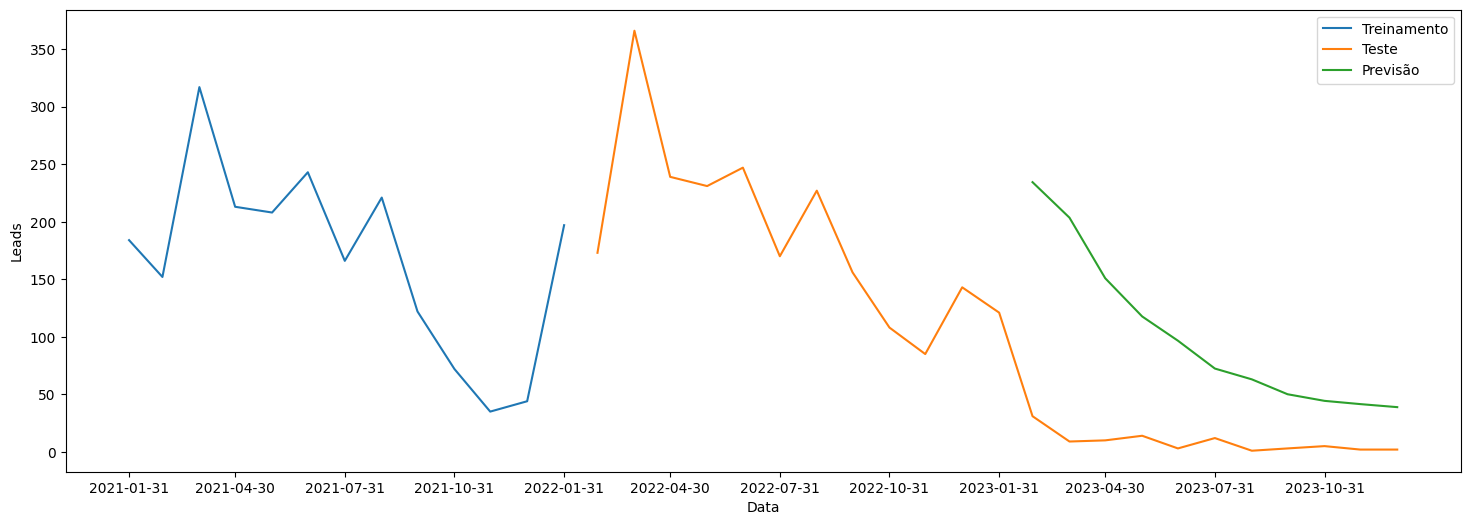

In [19]:
# Ajustar tamanho do gráfico
plt.figure(figsize=(18,6))

# Plotar os dados
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Teste')
plt.plot(prediction_dates, predictions, label='Previsão')

# Definir frequência dos ticks no eixo x (1 a cada 3 meses)
plt.xticks(pd.date_range(df.index[0], df.index[-1], freq='3M'))

plt.xlabel('Data')
plt.ylabel('Leads')
plt.legend()
plt.show()


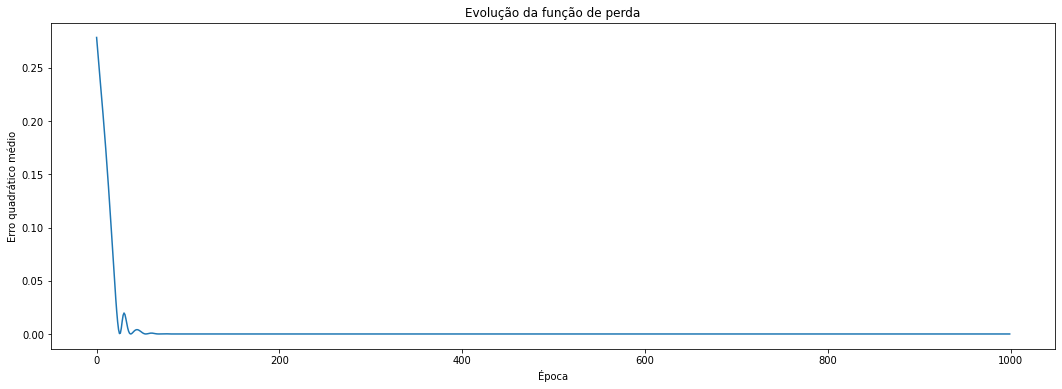

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(history.history['loss'])
plt.title('Evolução da função de perda')
plt.xlabel('Época')
plt.ylabel('Erro quadrático médio')
plt.show()


In [ ]:
!pip install pystan==2.19.1.1
!pip install convertdate
!pip install lunarcalendar
!pip install holidays==0.10.5
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement holidays==0.10.5 (from versions: 0.1, 0.2, 0.3, 0.3.1, 0.4, 0.4.1, 0.5, 0.6, 0.7, 0.8, 0.8.1, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.9.8, 0.9.9, 0.9.10, 0.9.11, 0.9.12, 0.10.1, 0.10.2, 0.10.3, 0.10.4, 0.10.5.2, 0.11.1, 0.11.2, 0.11.3.1, 0.12, 0.13, 0.14.2, 0.15, 0.16, 0.17, 0.17.2, 0.18, 0.19, 0.20)
ERROR: No 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


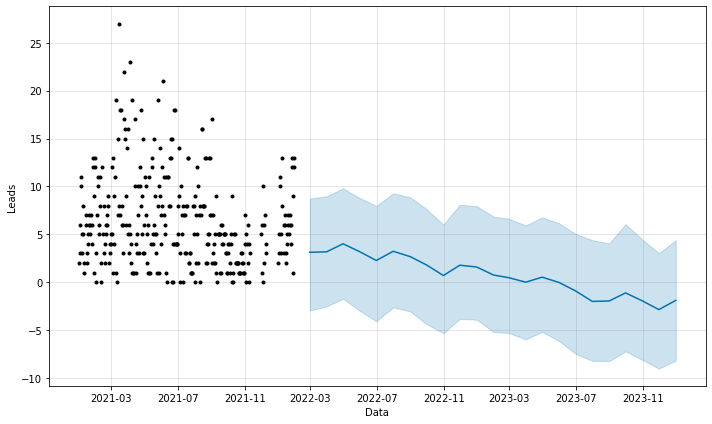

In [ ]:
import pandas as pd
from fbprophet import Prophet

# Carregar dados
df = pd.read_csv('leads.csv', delimiter=';', index_col='data', parse_dates=True)

# Remover entradas duplicadas
df = df[~df.index.duplicated()]

# Renomear colunas
df = df.rename(columns={'leads': 'y'})

# Criar dataframe para o Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['y']})

# Criar modelo Prophet
model = Prophet()

# Treinar modelo Prophet
model.fit(df_prophet.loc[:'2022-01-31'])

# Criar dataframe com datas para fazer previsões
future_dates = pd.date_range(start='2022-02-01', end='2023-12-31', freq='M')
future_df = pd.DataFrame({'ds': future_dates})

# Fazer previsões com o modelo
predictions = model.predict(future_df)

# Plotar resultados
model.plot(predictions)
plt.xlabel('Data')
plt.ylabel('Leads')
plt.show()


In [ ]:
import numpy as np

# Definir ponto de corte dos dados de teste
cutoff = '2022-12-31'

# Separar dados de treino e teste
train_data = df_prophet.loc[:cutoff]
test_data = df_prophet.loc[cutoff:, 'y']

# Fazer previsões com o modelo
forecast = model.predict(future_df)

# Separar previsões para dados de teste
test_predictions = forecast.loc[forecast['ds'] >= cutoff, 'yhat']

# Calcular MAPE
mape = np.mean(np.abs((test_data - test_predictions) / test_data)) * 100
print('MAPE:', mape)


MAPE: nan


/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/base.py:4024: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [ ]:
from sklearn.metrics import mean_absolute_error

# Definir conjunto de treinamento e teste
train_data = df.loc[:'2022-01-31'].reset_index().rename(columns={'data':'ds', 'leads':'y'})
test_data = df.loc['2022-02-28':].reset_index().rename(columns={'data':'ds', 'leads':'y'})

# Criar modelo Prophet
model = Prophet()

# Treinar modelo Prophet
model.fit(train_data)

# Fazer previsões
forecast = model.predict(test_data)

# Calcular erro de previsão
error = mean_absolute_error(test_data['y'], forecast['yhat'])
print('Erro absoluto médio:', error)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Erro absoluto médio: 4.681077556441188


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


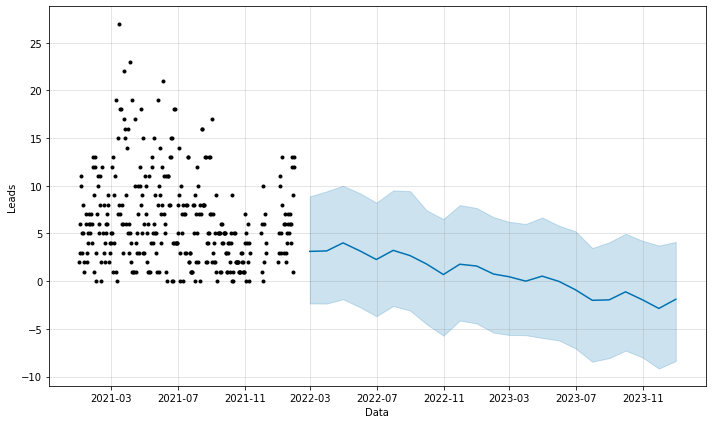

In [ ]:
import pandas as pd
from fbprophet import Prophet

# Carregar dados
df = pd.read_csv('leads.csv', delimiter=';', index_col='data', parse_dates=True)

# Remover entradas duplicadas
df = df[~df.index.duplicated()]

# Renomear colunas
df = df.rename(columns={'leads': 'y'})

# Criar dataframe para o Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['y']})

# Criar modelo Prophet
model = Prophet()

# Treinar modelo Prophet
model.fit(df_prophet.loc[:'2022-01-31'])

# Criar dataframe com datas para fazer previsões
future_dates = pd.date_range(start='2022-02-01', end='2023-12-31', freq='M')
future_df = pd.DataFrame({'ds': future_dates})

# Fazer previsões com o modelo
predictions = model.predict(future_df)

# Plotar resultados
model.plot(predictions)
plt.xlabel('Data')
plt.ylabel('Leads')
plt.show()


In [ ]:
import numpy as np
from fbprophet.diagnostics import performance_metrics

test_data = df['leads'][cutoff:].dropna()
predictions = forecast['yhat'][cutoff:].dropna()

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print('MAPE:', mape)


KeyError: ignored